In [3]:
import pandas as pd
from pandasai import SmartDataframe
from pandasai.llm.openai import OpenAI

In [11]:
from pandasai.llm import OpenAI
llm = OpenAI(api_token="YOUR_API_KEY")


In [13]:
df = pd.read_csv("MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv")
df = SmartDataframe(df, config={"llm": llm})

df.chat("What are the first five rows of the dataset?")



,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,NYS Municipal Boundaries,New York Zip Codes,Counties
0,02/06/2022 07:00:00 AM,N414,Flushing Av (G),BK,G,all,12,0,40.700380,-73.95023,POINT (-73.95023 40.70038),894,884.0,2090
1,03/27/2022 12:00:00 AM,N414,Flushing Av (G),BK,G,all,12,0,40.700380,-73.95023,POINT (-73.95023 40.70038),894,884.0,2090
2,03/27/2022 03:00:00 AM,N414,Flushing Av (G),BK,G,all,2,0,40.700380,-73.95023,POINT (-73.95023 40.70038),894,884.0,2090
3,03/27/2022 04:00:00 AM,N414,Flushing Av (G),BK,G,all,2,0,40.700380,-73.95023,POINT (-73.95023 40.70038),894,884.0,2090
4,05/08/2022 03:00:00 PM,R628,Saratoga Av (3),BK,3,all,70,0,40.661453,-73.91633,POINT (-73.91633 40.661453),894,890.0,2090


In [14]:
df.chat("Based on the information in the transit_timestamp column, can you create three separate columns as date, time and day name?")

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,NYS Municipal Boundaries,New York Zip Codes,Counties,date,time,day_name
0,02/06/2022 07:00:00 AM,N414,Flushing Av (G),BK,G,all,12,0,40.700380,-73.95023,POINT (-73.95023 40.70038),894,884.0,2090,2022-02-06,07:00:00,Sunday
1,03/27/2022 12:00:00 AM,N414,Flushing Av (G),BK,G,all,12,0,40.700380,-73.95023,POINT (-73.95023 40.70038),894,884.0,2090,2022-03-27,00:00:00,Sunday
2,03/27/2022 03:00:00 AM,N414,Flushing Av (G),BK,G,all,2,0,40.700380,-73.95023,POINT (-73.95023 40.70038),894,884.0,2090,2022-03-27,03:00:00,Sunday
3,03/27/2022 04:00:00 AM,N414,Flushing Av (G),BK,G,all,2,0,40.700380,-73.95023,POINT (-73.95023 40.70038),894,884.0,2090,2022-03-27,04:00:00,Sunday
4,05/08/2022 03:00:00 PM,R628,Saratoga Av (3),BK,3,all,70,0,40.661453,-73.91633,POINT (-73.91633 40.661453),894,890.0,2090,2022-05-08,15:00:00,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224186,04/22/2022 08:00:00 PM,R419,Zerega Av (6),BX,6,all,25,0,40.836487,-73.84704,POINT (-73.84704 40.836487),307,675.0,2032,2022-04-22,20:00:00,Friday
5224187,02/03/2023 04:00:00 AM,R419,Zerega Av (6),BX,6,all,27,0,40.836487,-73.84704,POINT (-73.84704 40.836487),307,675.0,2032,2023-02-03,04:00:00,Friday
5224188,01/30/2023 06:00:00 PM,R419,Zerega Av (6),BX,6,all,47,0,40.836487,-73.84704,POINT (-73.84704 40.836487),307,675.0,2032,2023-01-30,18:00:00,Monday
5224189,07/10/2022 10:00:00 AM,R419,Zerega Av (6),BX,6,all,43,0,40.836487,-73.84704,POINT (-73.84704 40.836487),307,675.0,2032,2022-07-10,10:00:00,Sunday


In [21]:
df.chat("Looking at the station_complex and ridership can you find the three busiest stations? ")

,ridership
station_complex,
"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)",68959119
"Grand Central-42 St (S,4,5,6,7)",37161409
"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",31634973


In [22]:
df.chat("Can you tell me the station names by looking at the station complex?")

"Flushing Av (G), Saratoga Av (3), 103 St (6), 103 St (1), 1 Av (L), 104 St (A), 103 St (B,C), 103 St-Corona Plaza (7), 110 St (6), 111 St (7), 104 St (J,Z), 116 St (2,3), 111 St (J), 111 St (A), 116 St (B,C), 116 St (6), 116 St-Columbia University (1), 125 St (1), 121 St (J,Z), 125 St (A,B,C,D), 125 St (2,3), 125 St (4,5,6), 137 St-City College (1), 135 St (B,C), 135 St (2,3), 14 St (A,C,E)/8 Av (L), 138 St-Grand Concourse (4,5), 145 St (1), 145 St (3), 14 St (F,M,1,2,3)/6 Av (L), 14 St-Union Sq (L,N,Q,R,W,4,5,6), 155 St (C), 157 St (1), 145 St (A,B,C,D), 155 St (B,D), 15 St-Prospect Park (F,G), 149 St-Grand Concourse (2,4,5), 167 St (4), 161 St-Yankee Stadium (B,D,4), 169 St (F), 163 St-Amsterdam Av (C), 170 St (4), 168 St (A,C,1), 167 St (B,D), 174 St (2,5), 170 St (B,D), 176 St (4), 175 St (A), 174-175 Sts (B,D), 18 Av (N), 18 Av (F), 18 Av (D), 181 St (1), 18 St (1), 181 St (A), 183 St (4), 182-183 Sts (B,D), 190 St (A), 191 St (1), 2 Av (F), 207 St (1), 20 Av (N), 20 Av (D), 215 

In [23]:
df.chat("Can you give information about the data set?")

'The dataset has 5224191 rows and 14 columns. The columns are: transit_timestamp, station_complex_id, station_complex, borough, routes, payment_method, ridership, transfers, latitude, longitude, Georeference, NYS Municipal Boundaries, New York Zip Codes, Counties.'

In [24]:
df.chat("How many different stations are there? Can you give the number?")

423

<string>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


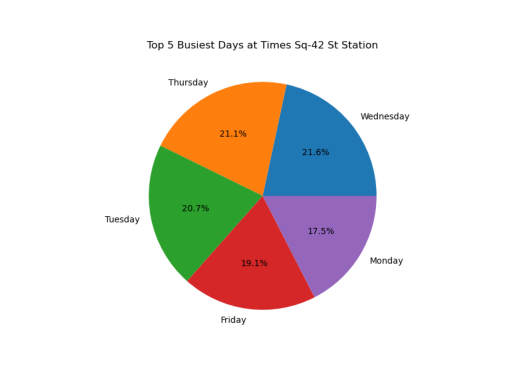

In [33]:
df.chat("Can you show the busiest 5 days_name in the pie chart, taking into account the number of passengers at Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7) station?")